In [1]:
import pandas as pd
import json

<h3> Part I: Exploratory Data Analysis

In [245]:
#Read in the login data
logins = pd.read_json('/Users/zhengzhang/Downloads/ultimate_challenge/logins.json')

In [55]:
#inspect the login data
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [403]:
#inspect the login data, notice the variable is not sorted
logins.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [296]:
#sort the data
logins_sort=logins.sort_values(by='login_time')
logins_sort

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
...,...
93136,1970-04-13 18:48:52
93137,1970-04-13 18:50:19
93139,1970-04-13 18:54:02
93141,1970-04-13 18:54:23


In [91]:
#start from the first login, calculate every 15 min window
from pandas.tseries.offsets import Hour, Minute
breakpoint=pd.date_range(logins_sort['login_time'].iloc[0],logins_sort['login_time'].iloc[-1],freq='15min')
breakpoint

DatetimeIndex(['1970-01-01 20:12:16', '1970-01-01 20:27:16',
               '1970-01-01 20:42:16', '1970-01-01 20:57:16',
               '1970-01-01 21:12:16', '1970-01-01 21:27:16',
               '1970-01-01 21:42:16', '1970-01-01 21:57:16',
               '1970-01-01 22:12:16', '1970-01-01 22:27:16',
               ...
               '1970-04-13 16:42:16', '1970-04-13 16:57:16',
               '1970-04-13 17:12:16', '1970-04-13 17:27:16',
               '1970-04-13 17:42:16', '1970-04-13 17:57:16',
               '1970-04-13 18:12:16', '1970-04-13 18:27:16',
               '1970-04-13 18:42:16', '1970-04-13 18:57:16'],
              dtype='datetime64[ns]', length=9788, freq='15T')

In [329]:
#calculate the time lapse from the first login, round to a 15-min interval
import math
diff={}
target_date=logins_sort['login_time'].iloc[0]
for logt in logins_sort['login_time']:
    diff[logt]=math.trunc((logt-target_date).total_seconds()/60/15)

In [372]:
#change the dictionary to pandas dataframe
df=pd.DataFrame(list(diff.items()),columns=['time','value']) 

In [404]:
#calculate occurance of logins in each 15 min window, notice if no log-in was recorded in the window, that 
#window is not listed
import collections
occurence=collections.Counter(df.value)
occ=pd.DataFrame(list(occurence.items()),columns=['value','counts'])
occ.head()

,value,counts
0,0,8
1,1,8
2,2,6
3,3,3
4,4,3


In [405]:
#Force the window with 0 count to be listed 
temp=pd.DataFrame(list(range(0,9788)),columns=['value'])
all=pd.merge(occ,temp,on=['value'],how='outer')
all_clean=all.fillna(0)
all_clean.describe()

,value,counts
count,9788.000000,9788.000000
mean,4893.500000,9.426338
std,2825.696551,8.195289
min,0.000000,0.000000
25%,2446.750000,3.000000
50%,4893.500000,7.000000
75%,7340.250000,13.000000
max,9787.000000,66.000000


In [407]:
#add the actual timewindow to the dataframe
all_clean['window']=breakpoint
all_clean[50:70]

,value,counts,window
50,54,2.0,1970-01-02 08:42:16
51,55,8.0,1970-01-02 08:57:16
52,56,5.0,1970-01-02 09:12:16
53,57,9.0,1970-01-02 09:27:16
54,58,5.0,1970-01-02 09:42:16
55,59,9.0,1970-01-02 09:57:16
56,60,7.0,1970-01-02 10:12:16
57,61,21.0,1970-01-02 10:27:16
58,62,14.0,1970-01-02 10:42:16
59,63,18.0,1970-01-02 10:57:16


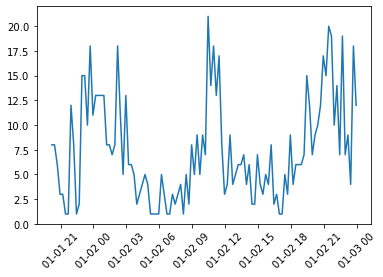

In [410]:
#Plot a daily log-in pattern
import matplotlib.pyplot as plt
plt.plot(all_clean.window[all_clean.window<"1970-01-03"],all_clean.counts[all_clean.window<"1970-01-03"])
plt.xticks(rotation=45)
plt.show()

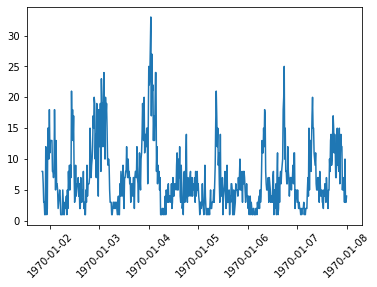

In [411]:
# Plot a weekly log-in pattern
plt.plot(all_clean.window[all_clean.window<"1970-01-08"],all_clean.counts[all_clean.window<"1970-01-08"])
plt.xticks(rotation=45)
plt.show()

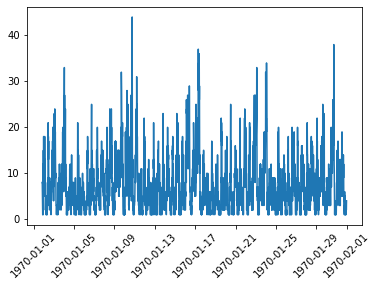

In [449]:
# Plot a monthly log-in pattern
plt.plot(all_clean.window[all_clean.window<"1970-02-01"],all_clean.counts[all_clean.window<"1970-02-01"])
plt.xticks(rotation=45)
plt.show()

<h4>Summary:
    

    
The aggregated login for every 15 min through 102 days, resulted in 9788 windows. The median logins in those windows are 7, the maximum is 66. The time series has clearly daily cycles, with everning and morning enjoy peak login activities. There maybe a weekly pattern as well. 

<h3> Part II: Experiment and Metrics Design
    

<h4>
    1. The key measure of success would be the number of trips that are between those two cities. The hypothesis would be if the experiment is successful, there will be a significant increase in the trips between the two cities.
<h4>
    2. a. We would recruit 100 drivers from each city, and randomize them to either control group or experiment group at 1:1 ratio. The experimental group enrollees are offered free tolls for 30 days. Each enrollees are asked to record the starting and ending cities for each trip. At the end of the 30 days, we will calculate the number of trips that are between those two cities for each enrollee.
    
<h4>   b. We will use 2-sample t-test to compare the average number of between-city trips between those two groups. 
    
<h4>   c. If the average number of between-city trips are significantly higher in the experiment group, then we would inform the city operations team that the free-toll is likely to drive more cross-city travels. 

<h3> Part III: Predictive Modeling

In [419]:
#Read in dataset
data = pd.read_json('/Users/zhengzhang/Downloads/ultimate_challenge/ultimate_data_challenge.json')

In [420]:
#Inspect the data
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [421]:
#inspect the data
data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [422]:
#inspect the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [423]:
data['phone'].value_counts(normalize=True)

iPhone     0.697162
Android    0.302838
Name: phone, dtype: float64

In [424]:
data['ultimate_black_user'].value_counts(normalize=True)

False    0.62292
True     0.37708
Name: ultimate_black_user, dtype: float64

In [425]:
data['signup_date'].value_counts()

2014-01-18    2948
2014-01-25    2885
2014-01-11    2402
2014-01-24    2284
2014-01-17    2149
2014-01-31    2100
2014-01-19    2028
2014-01-10    2021
2014-01-06    1763
2014-01-01    1737
2014-01-26    1708
2014-01-23    1606
2014-01-07    1486
2014-01-04    1485
2014-01-30    1471
2014-01-09    1433
2014-01-16    1431
2014-01-22    1369
2014-01-05    1343
2014-01-12    1334
2014-01-20    1295
2014-01-28    1284
2014-01-08    1275
2014-01-27    1236
2014-01-21    1234
2014-01-03    1213
2014-01-29    1197
2014-01-14    1120
2014-01-15    1110
2014-01-13    1049
2014-01-02    1004
Name: signup_date, dtype: int64

In [426]:
data['last_trip_date'].value_counts()

2014-06-29    2036
2014-06-28    1679
2014-06-30    1408
2014-06-27    1120
2014-06-22    1024
              ... 
2014-02-26      79
2014-03-11      79
2014-02-20      74
2014-03-10      69
2014-03-04      69
Name: last_trip_date, Length: 182, dtype: int64

In [427]:
#change the "last_trip_date" to datetime
lasttrip=pd.to_datetime(data['last_trip_date'])

In [428]:
#change the "signup_date" to datetime
signup=pd.to_datetime(data['signup_date'])

In [429]:
#calculate the difference between the last trip and sign up date, as check if it is more than 5 months. If it is, 
#then the user is retained
data['retain']=(lasttrip-signup).dt.total_seconds()/24/3600>150

In [430]:
# 24% retained
data['retain'].value_counts(normalize=True)

False    0.75604
True     0.24396
Name: retain, dtype: float64

In [431]:
# Code dummy variables for city and phone, drop the missing data with 
data['isAstapor']=(data['city']=='Astapor').astype(int)
data['isWinterfell']=(data['city']=='Winterfell').astype(int)
data['isIphone']=(data['phone']=='iPhone').astype(int)
data_clean=data.dropna(axis=0)

In [433]:
#prepare the predictor X
#prepare y
y=data_clean['retain']
X=data_clean.drop(['last_trip_date','retain','city','phone','signup_date'],axis=1)

In [448]:
y.value_counts(normalize=False)

False    30209
True     11236
Name: retain, dtype: int64

In [443]:
#There are 11 predictors, 41445 users
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  41445 non-null  int64  
 1   avg_rating_of_driver    41445 non-null  float64
 2   avg_surge               41445 non-null  float64
 3   surge_pct               41445 non-null  float64
 4   ultimate_black_user     41445 non-null  bool   
 5   weekday_pct             41445 non-null  float64
 6   avg_dist                41445 non-null  float64
 7   avg_rating_by_driver    41445 non-null  float64
 8   isAstapor               41445 non-null  int64  
 9   isWinterfell            41445 non-null  int64  
 10  isIphone                41445 non-null  int64  
dtypes: bool(1), float64(6), int64(4)
memory usage: 3.5 MB


In [ ]:
#Looking for correlation, not a lot correlation
import seaborn as sns
sns.heatmap(X.corr(),annot=False)
#plt.savefig("heatmap.png",bbox_inches="tight")

In [435]:
#Logistic regression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty':['l2','none']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=21,stratify=y)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 268.2695795279727, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7449243378316543


In [438]:
y_pred=logreg_cv.predict(X_test)
print(confusion_matrix(y_pred,y_test))

[[8602 2662]
 [ 461  709]]


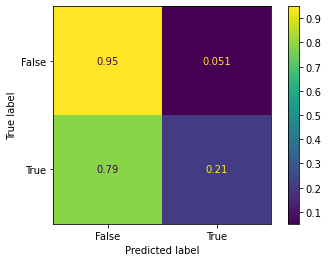

In [439]:
# Poor performance with 21% sensitivity
plot_confusion_matrix(logreg_cv,X_test,y_test,normalize='true')

In [280]:
# Try Random Forest
from sklearn.ensemble import RandomForestClassifier
#X=csmh_final.drop(['date','county','state','st_abbr','deaths'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
#X_train=X_train_1.drop(['confirmed'],axis=1)
#X_test=X_test_1.drop(['confirmed'],axis=1)
param_grid = {'n_estimators': np.arange(50, 100)}
rf=RandomForestClassifier(random_state=21)
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)
y_pred=rf_cv.predict(X_test)

In [281]:
rf_cv.best_params_

{'n_estimators': 98}

In [282]:
print(confusion_matrix(y_pred,y_test))

[[7782 1767]
 [1281 1604]]


In [283]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       False       0.86      0.81      0.84      9549
        True       0.48      0.56      0.51      2885

    accuracy                           0.75     12434
   macro avg       0.67      0.69      0.67     12434
weighted avg       0.77      0.75      0.76     12434



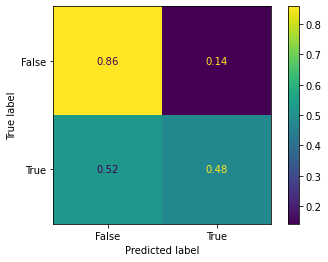

In [284]:
#the sensitivity is very low at 48% 
plot_confusion_matrix(rf_cv,X_test,y_test,normalize='true')

In [286]:
#Consider imbalanced-learn 
conda install -c conda-forge imbalanced-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/zhengzhang/opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.5                |   py38h32f6830_1         3.0 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.7.0-py_1
  python_abi         conda-forge/osx-64:

In [287]:
#use balanced random forest
from imblearn.ensemble import BalancedRandomForestClassifier
param_grid = {'n_estimators': np.arange(50, 100)}
brf = BalancedRandomForestClassifier(random_state=21)
brf_cv = GridSearchCV(brf, param_grid, cv=5)
brf_cv.fit(X_train, y_train)
brf_cv.best_params_

{'n_estimators': 98}

In [288]:
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import sensitivity_specificity_support, sensitivity_score, specificity_score
y_pred = brf_cv.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.7278958297553435


In [289]:
print(confusion_matrix(y_pred,y_test))

[[6201  770]
 [2862 2601]]


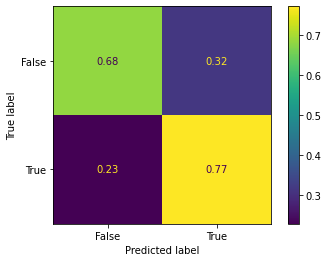

In [291]:
# sensitivity is greatly improved at 77%
plot_confusion_matrix(brf_cv,X_test,y_test,normalize='true')

In [292]:
# TRY AdaBoost
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=21)
eec.fit(X_train, y_train) 
y_pred = eec.predict(X_test)
balanced_accuracy_score(y_test, y_pred)  

0.7440785558148237

In [293]:
print(confusion_matrix(y_pred,y_test))

[[6618  816]
 [2445 2555]]


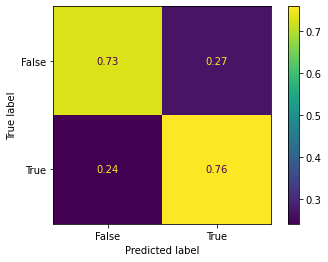

In [294]:
#sensitivity is a little worse than the balanced random forest
plot_confusion_matrix(eec,X_test,y_test,normalize='true')

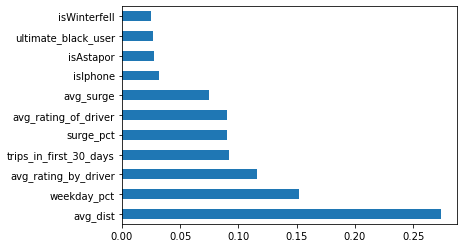

In [440]:
# The most important feature for balanced random forest is average distance, weekday percentage and average rating by driver. 
brf.fit(X_train, y_train)
feat_importances = pd.Series(brf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

<h4>Summary:
    
    
    
After data cleaning which include removing the users with missing data, we have retained 41445/50000 (82.89%) observed users. 
    
of those 41445 users, 11236(27%) are active in the 6th month on the system, which is defined as their last trip occurred at least 150 days after their initial sign-up.  

We tried the two machine learning algorithms, logistic regression and random forest, with 70%/30% train/test split and 5 fold cross-validation. Both perform poorly on the test set with less than 50% sensitivity. After using balanced random forest and balanced AdaBoost, we were able to achieve 77% sensitivity. 

The most important features are average distance per trip, weekday trips percent and average rating by the drivers. Ultimate could identify users who took longer trips, more weekday trips and higher ratings and offer retention bonus to boost their engagement. 